# Dataset Preparation


### Setup

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
seed = 69
dataset_url ="hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv"

## Data Collection


In [172]:
df = pd.read_csv(dataset_url)

### Clean up

In [173]:
# only keeping the top 1000 most popular songs
df = df.sort_values(by='popularity', ascending=False).head(10000)

df.head()

# # removing uncessary columns
df.drop(columns=['Unnamed: 0', 'track_id'], inplace=True)

# dropping 'artsts', 'album_name' and 'track_name' columns as with one hot encoding, it will create way too many columns

df.drop(columns=['artists', 'album_name', 'track_name'], inplace=True)

## Handling missing values


In [112]:
# checking for missing values

df.isnull().sum()

# dropping the rows with missing values

df.dropna(inplace=True)

df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


## Encoding categorical features with One-Hot Encoding


In [113]:
categorical_features = df.select_dtypes('object').columns
categorical_features = categorical_features.drop('track_genre') # removing track_genre as it's our target column

df = pd.get_dummies(df, columns=categorical_features)

df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


## Encoding binary class label


In [114]:
from sklearn.preprocessing import LabelEncoder

# Encoding binary columns as -1 and 1 instead of True and False

binary_columns = ['explicit']
df.explicit.replace({False: -1, True: 1}, inplace=True)
df.head()


label_encoder = LabelEncoder()
df['track_genre_encoded'] = label_encoder.fit_transform(df.track_genre)

df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
20001,100,156943,-1,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance,11
81051,100,156943,-1,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop,40
51664,99,198937,-1,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,26
81210,98,175238,1,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop,40
89411,98,162637,-1,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton,48


# Model Building


In [115]:
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.naive_bayes import *

## Splitting the dataset into training and testing sets


In [120]:
standard_scaler = StandardScaler()

target = 'popularity'
X = df.drop(columns=[target, 'track_genre'])
y = df[target]

X = standard_scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


## Evaluation function


In [148]:
def evaluate(expected, predicted):  
  scores = {
    'Root Mean Squared Error': np.sqrt(mean_squared_error(expected, predicted)),
    'Mean Absolute Error': mean_absolute_error(expected, predicted),
    'Mean Abosulute Percentage Error': mean_absolute_percentage_error(expected, predicted),
    'R2 Score': r2_score(expected, predicted),
  }
  for score, value in scores.items():
    print(f'{score.capitalize()}: {value:.3f}')

## Model Building


In [124]:
model = LogisticRegression()

## Model Evaluation


### Cross Validation

In [151]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2', 'neg_root_mean_squared_error']
cv = 10
result = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)
for metric, values in result.items():
  if 'time' not in metric:
    name = metric.replace('test_', '').replace('neg_', '').replace('_', ' ').capitalize()
    print(f'{name}: {-np.mean(values):.3f} +- {np.std(values):.3f}')

Mean squared error: 17.141 +- 2.173
Mean absolute error: 2.721 +- 0.208
Mean absolute percentage error: 0.031 +- 0.002
R2: 0.285 +- 0.232
Root mean squared error: 4.131 +- 0.272


### Cross Validation with KFold

In [140]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
result = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)
for metric, values in result.items():
  if 'time' not in metric:
    name = metric.replace('test_', '').replace('neg_', '').replace('_', ' ').capitalize()
    print(f'{name}: {-np.mean(values):.3f} +- {np.std(values):.3f}')

Mean squared error: 19.366 +- 4.854
Mean absolute error: 2.911 +- 0.377
Mean absolute percentage error: 0.033 +- 0.004
R2: 0.490 +- 0.325


### Cross Validation with StratifiedKFold

In [142]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
result = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)
for metric, values in result.items():
  if 'time' not in metric:
    name = metric.replace('test_', '').replace('neg_', '').replace('_', ' ').capitalize()
    print(f'{name}: {-np.mean(values):.3f} +- {np.std(values):.3f}')

Mean squared error: 17.633 +- 2.866
Mean absolute error: 2.775 +- 0.208
Mean absolute percentage error: 0.032 +- 0.002
R2: 0.306 +- 0.175


## Model Building with Hyperparameter Tuning


In [144]:
model = LogisticRegression()

params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'penalty': ['l1', 'l2'],
  'solver': ['liblinear']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(model, params, cv=cv)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}



## Model Evaluation


In [149]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

evaluate(y_test, y_pred)

Root mean squared error: 5.313
Mean absolute error: 3.470
Mean abosulute percentage error: 0.040
R2 score: -0.873


# Comparing Different Models Performance

## Model Building

In [202]:
models = {
  'Linear Regression': LinearRegression(),
  'K Nearest Neighbors': KNeighborsRegressor(),
  'Random Forest': RandomForestRegressor(),
  'Naive Bayes': GaussianNB(),
}

## Model Comparison

In [203]:
scoring = 'neg_mean_squared_error'

results = {}

for name, model in models.items():
  results[name] = -cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
  

result_df = pd.DataFrame(results).transpose()

result_df['mean'] = result_df.mean(axis=1)
result_df['std'] = result_df.std(axis=1)
result_df = result_df.sort_values(by=['mean', 'std'], ascending=True)
result_df

,0,1,2,3,4,5,6,7,8,9,mean,std
Random Forest,4.957908,10.770103,5.270126,4.302691,6.123482,5.083394,3.226046,5.212894,7.576819,5.361816,5.788528,1.971538
K Nearest Neighbors,8.855000,17.977500,9.756000,9.985000,13.137500,12.056000,8.533500,11.829000,12.794500,11.135500,11.605950,2.605495
Linear Regression,10.434146,21.381064,11.207613,12.493214,15.038920,14.172361,9.711653,9.594819,14.182262,10.924320,12.914037,3.374429
Naive Bayes,35.237500,73.462500,71.487500,65.462500,59.925000,62.275000,73.887500,68.425000,68.887500,57.800000,63.685000,10.831813


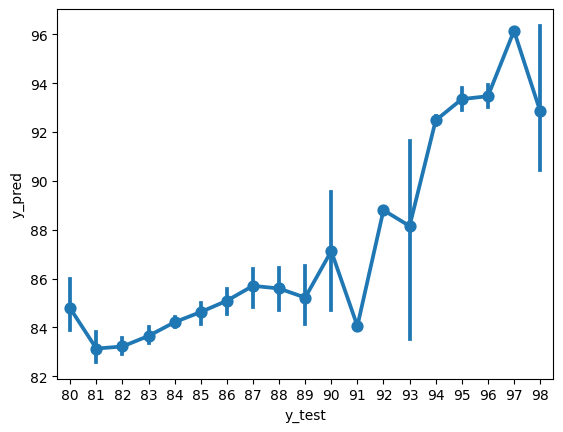

Text(0, 0.5, 'Error')

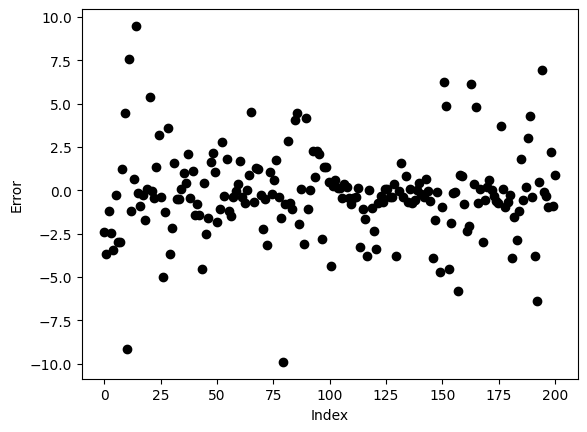

In [201]:
import matplotlib.pyplot as plt

best_model = RandomForestRegressor()
best_model.fit(x_train, y_train)

# plot the expected vs predicted values

y_pred = best_model.predict(x_test)

new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# draw a pointplot with error bars
sns.pointplot(data=new_df, x='y_test', y='y_pred')


difference = y_test - y_pred
x = np.linspace(0, len(difference), len(difference))

# draw on new plot
plt.show()

fig, ax = plt.subplots()
ax.plot(x, difference, 'o', color='black')
ax.set_xlabel('Index')
ax.set_ylabel('Error')
